In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/NLP/IMDB Dataset.csv")

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df = df.sample(n=30000) # Select 30000 random rows of your dataset

In [ ]:
df.shape

(30000, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

<Axes: xlabel='sentiment', ylabel='count'>

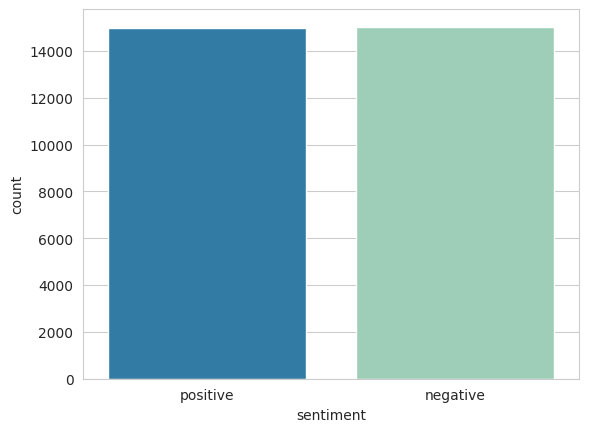

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='sentiment',data=df, palette='YlGnBu_r')

In [ ]:
df['label'] = df['sentiment'].map({'positive':1,'negative':0})

<Axes: xlabel='label', ylabel='count'>

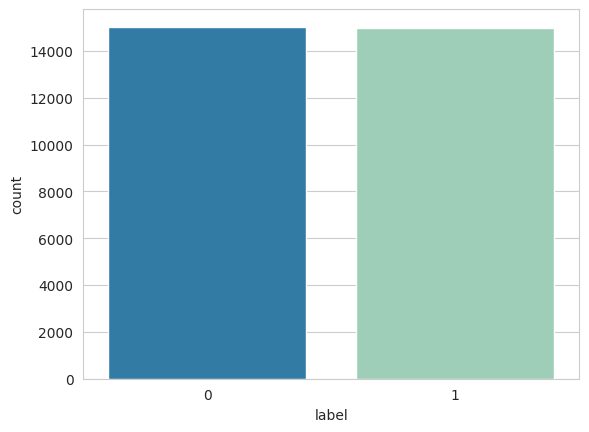

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='label',data=df, palette='YlGnBu_r')

In [ ]:
# Define preprocessing function
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Removing special characters and punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Joining the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing function to dataset
df['preprocessed_text'] = df['review'].apply(preprocess_text)

In [ ]:
df.isna().sum()

review               0
sentiment            0
label                0
preprocessed_text    0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(27000,)

In [ ]:
X_test.shape

(3000,)

In [ ]:
# Extract bag-of-words features from the training and testing sets
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
# Transform bag-of-words features into TF-IDF features
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
# Train an SVR model with a linear kernel on the training data
svr = SVR(kernel='linear')
svr.fit(X_train_tfidf, y_train)

SVR(kernel='linear')

In [ ]:
# Predict the labels of the testing data and convert the predictions to binary labels
y_pred = svr.predict(X_test_tfidf)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1467
           1       0.85      0.88      0.87      1533

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [ ]:
df['preprocessed_text'][5524]

'realli sad touch movi deal subject child abus realli sad mostli true stori happen everyday elijah wood joseph mazzello play two children lorrain bracco singl mother tri make home live parent man like call king come life hit youngest boy bobbi two brother vow tell mother final find bobbi hurt badli end kind ruin total unbeliev except love movi'

In [ ]:
df['label'][5524]

1

In [ ]:
text = df['preprocessed_text'][5524]
X_test_counts = vectorizer.transform([text])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
pred = svr.predict(X_test_tfidf)

In [ ]:
if pred>0.5:
  print(1)
else:
  print(0)

1


**With 20000 data**

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/My Drive/NLP/IMDB Dataset.csv")

In [ ]:
df = df.sample(n=20000) # Select 30000 random rows of your dataset

In [ ]:
df.head()

,review,sentiment,preprocessed_text,label
11485,"Like most sports movies, it's not surprising t...",positive,like sport movi surpris peopl know someth spor...,1
28236,Emilio Estevez actually directed a good movie-...,positive,emilio estevez actual direct good movi woulda ...,1
12768,This is another one of those 'humans vs insect...,negative,anoth one vs featur theme popular late 70 ca r...,0
15373,What on earth happened to RGV? There are so ma...,negative,earth happen rgv mani thing wrong movi one nee...,1
27694,I was to young to ever know much about prince ...,positive,young ever know much princ past year seen lot ...,1


In [ ]:
# Define preprocessing function
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Removing special characters and punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Joining the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing function to dataset
df['preprocessed_text'] = df['review'].apply(preprocess_text)

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

nltk.download('opinion_lexicon')
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Assuming your dataset is a pandas DataFrame called 'df' with a column called 'preprocessed_text'
def opinion(text):
    words = nltk.word_tokenize(text)
    opinion_count = 0
    for word in words:
        if word in positive_words:
            opinion_count += 1
        elif word in negative_words:
            opinion_count -= 1
    return 1 if opinion_count > 0 else 0

df['label'] = df['preprocessed_text'].apply(opinion)

X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.1, random_state=42)

X_train_opinion = []
for text in X_train:
    words = nltk.word_tokenize(text)
    opinion_count = 0
    for word in words:
        if word in positive_words:
            opinion_count += 1
        elif word in negative_words:
            opinion_count -= 1
    X_train_opinion.append([opinion_count])

X_test_opinion = []
for text in X_test:
    words = nltk.word_tokenize(text)
    opinion_count = 0
    for word in words:
        if word in positive_words:
            opinion_count += 1
        elif word in negative_words:
            opinion_count -= 1
    X_test_opinion.append([opinion_count])

svr = SVR(kernel='linear')
svr.fit(X_train_opinion, y_train)

y_pred = svr.predict(X_test_opinion)
y_pred = [1 if pred > 0 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Accuracy: 0.607


In [ ]:
new_words = df['preprocessed_text'][11485]
new_opinion_count = 0
for word in new_words:
    if word in positive_words:
        new_opinion_count += 1
    elif word in negative_words:
        new_opinion_count -= 1

prediction = svr.predict([[new_opinion_count]])
if prediction <0.5:
  print("Positive")
else:
  print("Negative")

Positive
